In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import csv
import pickle

In [138]:
import csv
validGroups = ['g1', 'g2', 'g3', 'g4', 'g5', 'g6']
expectedLength = 17
groupIdx1 = 3
groupIdx2 = 4
# targets, time-step, time-limit, finisher (blank if all timed out), 
# score of g1, time remaining for g1,score of g2, time remaining for 
# g2, ....,score of g6, time remaining for g6
header = ['targets', 'time-step', 'time-limit', 'finisher',
          'g1_score', 'g1_time',
          'g2_score', 'g2_time',
          'g3_score', 'g3_time',
          'g4_score', 'g4_time',
          'g5_score', 'g5_time',
          'g6_score', 'g6_time']
allLen = []
with open('results.csv', 'r') as resultsOrig, open('newResults.csv', 'w') as resultsNew:
    csvWriter = csv.writer(resultsNew, quoting=csv.QUOTE_MINIMAL)
    csvWriter.writerow(header)
    for idx, line in enumerate(resultsOrig):
        line = line.strip()
        line = line.replace(' ', '')
        line = line.split(',')
        if len(line) == expectedLength:
            outLine = line
        else:
            if line[groupIdx1] in validGroups and line[groupIdx2] in validGroups:
                finishingGroups = [x for x in line if x in validGroups]
                outLine = line[0:3] + ['-'.join(finishingGroups)]
                outLine = outLine + line[(3 + len(finishingGroups)):]
            else:
                print("yeeeeaaahhh boooooiii")
                1/0
        outLine = outLine[:-1]
        allLen.append(len(outLine))
        csvWriter.writerow(outLine)

In [3]:
header = ['targets', 'time-step', 'time-limit', 'finisher',
          'g1_score', 'g1_time',
          'g2_score', 'g2_time',
          'g3_score', 'g3_time',
          'g4_score', 'g4_time',
          'g5_score', 'g5_time',
          'g6_score', 'g6_time']
resultsDF = pd.read_csv('newResults.csv', sep = ',', names = header)
resultsDF

,targets,time-step,time-limit,finisher,g1_score,g1_time,g2_score,g2_time,g3_score,g3_time,g4_score,g4_time,g5_score,g5_time,g6_score,g6_time
0,targets,time-step,time-limit,finisher,g1_score,g1_time,g2_score,g2_time,g3_score,g3_time,g4_score,g4_time,g5_score,g5_time,g6_score,g6_time
1,5,0.004,1000,g2,12.0,579,26.0,682,19.0,559,13.0,681,20.0,550,15.0,665
2,5,0.015,1000,g2,18.0,896,23.0,915,14.0,891,19.0,961,18.0,906,13.0,769
3,25,0.004,2500,g3,99.0,1787,68.0,2005,92.0,1697,86.0,1661,93.0,1547,85.0,1558
4,25,0.015,2500,g6,75.0,2237,81.0,2360,97.0,2268,81.0,2283,106.0,2246,80.0,2063
5,100,0.004,10000,g3,345.0,8318,330.0,9282,327.0,8385,371.0,5714,336.0,7961,353.0,6653
6,100,0.015,10000,g6,335.0,9271,355.0,9713,306.0,9396,364.0,8701,377.0,9305,357.0,8980
7,500,0.004,50000,g3,1769.0,40894,1694.0,45075,1768.0,39891,1699.0,8099,1758.0,8283,1762.0,38662
8,500,0.015,50000,g3,1908.0,44789,1669.0,45884,1630.0,42869,1685.0,38889,1743.0,38688,1794.0,47054
9,5,0.004,1000,g5,16.0,774,27.0,847,14.0,699,15.0,912,21.0,724,11.0,783


In [4]:
list(resultsDF)

['targets',
 'time-step',
 'time-limit',
 'finisher',
 'g1_score',
 'g1_time',
 'g2_score',
 'g2_time',
 'g3_score',
 'g3_time',
 'g4_score',
 'g4_time',
 'g5_score',
 'g5_time',
 'g6_score',
 'g6_time']

In [5]:
from collections import Counter, defaultdict
import pprint
pp = pprint.PrettyPrinter(indent = 4)


In [ ]:
np.std

In [6]:
header = ['targets', 'time-step', 'time-limit', 'finisher',
          'g1_score', 'g1_time',
          'g2_score', 'g2_time',
          'g3_score', 'g3_time',
          'g4_score', 'g4_time',
          'g5_score', 'g5_time',
          'g6_score', 'g6_time']

resultsDict = defaultdict(lambda : defaultdict(list))
tournamentCongfigs = []
# playerScoreOrder = []
maxRows = None
with open('newResults.csv') as resultsFile:
    next(resultsFile)
    for counter, line in enumerate(resultsFile):
        if counter == maxRows:
            break
        line = line.strip().split(',')
        tournamentCongfigs.append("_".join(line[0:3]))
        configKey = "_".join(line[0:3])
        finisher = line[3]
        if '-' in finisher:
            for tiedFinisher in finisher.split('-'):
                resultsDict[configKey]['finisher'].append(tiedFinisher)
        else:
            resultsDict[configKey]['finisher'].append(finisher)
        for idx in range(4, 16, 2):# iterate through scores
            playerKey = header[idx]
            resultsDict[configKey][playerKey].append(float(line[idx]))
        for idx in range(5, 17, 2):# iterate through remaining time
            playerKey = header[idx] 
            resultsDict[configKey][playerKey].append(float(line[idx]))
# print(tournamentCongfigs[0])

In [7]:
Counter(tournamentCongfigs)

Counter({'100_0.004_10000': 566,
         '100_0.015_10000': 565,
         '25_0.004_2500': 566,
         '25_0.015_2500': 566,
         '500_0.004_50000': 563,
         '500_0.015_50000': 563,
         '5_0.004_1000': 566,
         '5_0.015_1000': 566})

In [8]:
resultsDict.keys()

dict_keys(['5_0.004_1000', '5_0.015_1000', '25_0.004_2500', '25_0.015_2500', '100_0.004_10000', '100_0.015_10000', '500_0.004_50000', '500_0.015_50000'])

In [9]:
resultsSummaryDict = defaultdict(lambda : defaultdict(lambda : defaultdict(float)))
for configKey, configResults in resultsDict.items():
#     print(configResults.keys())
    scoresMat = None
    playerIdx = 0
    keys = ['g1_score', 'g2_score', 'g3_score',
        'g4_score', 'g5_score', 'g6_score']
    for key, results in configResults.items():
        if key == 'finisher':
            resultsSummaryDict[configKey][key] = Counter(results)
        else:
            resultsSummaryDict[configKey][key]['mean'] = np.mean(results)
            resultsSummaryDict[configKey][key]['std'] = np.std(results)
            if scoresMat is None:
                scoresMat = np.ones(shape = [6, len(results)])*-1
            if 'score' in key:
                if key != keys[playerIdx]:# this ensures that idx_0 corresponds to player
                    # 1, idx_1 corresponds to player 2, etc.
                    print("shit")
                    1/0
                scoresMat[playerIdx, :] = results
                playerIdx += 1
    playerWins = Counter(np.argmax(scoresMat, axis = 0))
    for idx, key in enumerate(keys):
        resultsSummaryDict[configKey][key]['wins'] = playerWins[idx]

In [10]:
resultsSummaryDict[configKey].keys()

dict_keys(['finisher', 'g1_score', 'g2_score', 'g3_score', 'g4_score', 'g5_score', 'g6_score', 'g1_time', 'g2_time', 'g3_time', 'g4_time', 'g5_time', 'g6_time'])

In [11]:
playerWins = np.argmax(scoresMat, axis = 0)
Counter(playerWins)

Counter({0: 96, 1: 84, 2: 12, 3: 115, 4: 92, 5: 164})

In [12]:
configKey

'500_0.015_50000'

In [13]:
scoresMat.shape

(6, 563)

In [14]:
len(results)

563

In [15]:
resultsSummaryDict['5_0.004_1000']

defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
            {'finisher': Counter({'g1': 106,
                      'g2': 114,
                      'g3': 81,
                      'g4': 90,
                      'g5': 120,
                      'g6': 79}),
             'g1_score': defaultdict(float,
                         {'mean': 16.477031802120141,
                          'std': 4.9362009922345882,
                          'wins': 90}),
             'g1_time': defaultdict(float,
                         {'mean': 630.98409893992937,
                          'std': 114.18368173569343}),
             'g2_score': defaultdict(float,
                         {'mean': 18.275618374558302,
                          'std': 4.5638391898906567,
                          'wins': 108}),
             'g2_time': defaultdict(float,
                         {'mean': 692.54063604240287,
                          'std': 90.268646609585275}),
             'g3_score': defaultdict(float,


In [170]:
resultsSummaryDict['5_0.004_1000']

defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
            {'finisher': Counter({'g1': 106,
                      'g2': 114,
                      'g3': 81,
                      'g4': 90,
                      'g5': 120,
                      'g6': 79}),
             'g1_score': defaultdict(float,
                         {'mean': 16.477031802120141,
                          'std': 4.9362009922345882,
                          'wins': 90}),
             'g1_time': defaultdict(float,
                         {'mean': 630.98409893992937,
                          'std': 114.18368173569343}),
             'g2_score': defaultdict(float,
                         {'mean': 18.275618374558302,
                          'std': 4.5638391898906567,
                          'wins': 108}),
             'g2_time': defaultdict(float,
                         {'mean': 692.54063604240287,
                          'std': 90.268646609585275}),
             'g3_score': defaultdict(float,


In [52]:
# configResultsDict = resultsSummaryDict['5_0.004_1000']
# configTitle = '5 Targets, 0.004 Time Step, 1000 Time Limit'
# xAxis = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']


# xAxisKeys = ['g1_score', 'g2_score', 'g3_score',
#     'g4_score', 'g5_score', 'g6_score']
# y = np.ones(shape = [len(xAxisKeys)])*-1
# x = np.arange(6)
# std = np.ones(shape = [len(xAxisKeys)])*-1
# # nWins = np.ones(shape = [len(xAxisKeys)])*-1
# # fracWins = np.ones(shape = [len(xAxisKeys)])*-1
# for idx, key in enumerate(xAxisKeys):
#     y[idx] = configResultsDict[key]['mean']
#     std[idx] = configResultsDict[key]['std']
#     nWins[idx] = configResultsDict[key]['wins']
# # fracWins = nWins/np.sum(nWins)
# plt.bar(x, y, yerr = std)  
# plt.ylabel('Avg Scores')
# plt.title(configTitle)
# plt.xticks(x, xAxis)
# # plt.yticks(np.arange(0, 81, 10))
# # plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()
    

In [20]:
def plotConfigScores(configResultsDict, configTitle, savepath, rescaleBool):
    xAxis = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6']


    xAxisKeys = ['g1_score', 'g2_score', 'g3_score',
        'g4_score', 'g5_score', 'g6_score']
    y = np.ones(shape = [len(xAxisKeys)])*-1
    x = np.arange(6)
    std = np.ones(shape = [len(xAxisKeys)])*-1
    # nWins = np.ones(shape = [len(xAxisKeys)])*-1
    # fracWins = np.ones(shape = [len(xAxisKeys)])*-1
    for idx, key in enumerate(xAxisKeys):
        y[idx] = configResultsDict[key]['mean']
        std[idx] = configResultsDict[key]['std']
#         nWins[idx] = configResultsDict[key]['wins']
    # fracWins = nWins/np.sum(nWins)
    plt.bar(x, y, yerr = std, color = '#1f77b4')  
    plt.ylabel('Avg Scores')
    plt.title(configTitle)
    plt.xticks(x, xAxis)
#     print(y)
    if rescaleBool:
        plt.ylim((np.min(y) - np.min(y)*.15), (np.max(y) + np.max(y)*.15))
    # plt.yticks(np.arange(0, 81, 10))
    # plt.legend((p1[0], p2[0]), ('Men', 'Women'))

#     plt.show()
    plt.savefig(savePath,dpi = 300)
    return(np.array(xAxis)[np.argsort(y)][::-1], np.sort(y)[::-1])




In [84]:
resultsDict.keys()

dict_keys(['5_0.004_1000', '5_0.015_1000', '25_0.004_2500', '25_0.015_2500', '100_0.004_10000', '100_0.015_10000', '500_0.004_50000', '500_0.015_50000'])

In [39]:
savePaths = 'img/AvgScores'
configKeys = resultsSummaryDict.keys()
configTitle = '{} Targets, {} Time Step, {} Time Limit'
rescaleList = [False, False, True, True, True, True, True, True, True]
for idx, key in enumerate(resultsDict.keys()):
    configResultsDict = resultsSummaryDict[key]
    savePath = 'img/AvgScores_{}.png'.format(key)
    playersOrdered, avgScoresOrdered = plotConfigScores(configResultsDict, configTitle.format(*key.split('_')), savePath,
                    rescaleBool = rescaleList[idx])
    avgScoresOrdered = avgScoresOrdered.round(decimals = 1)
    print(configTitle.format(*key.split('_')))
    print(playersOrdered)
    print(avgScoresOrdered)
    print(((avgScoresOrdered[0] - avgScoresOrdered[-1])/((avgScoresOrdered[0] + avgScoresOrdered[-1])/2)))
    print('\n')
    plt.clf()

5 Targets, 0.004 Time Step, 1000 Time Limit
['G5' 'G2' 'G4' 'G6' 'G3' 'G1']
[ 18.4  18.3  17.6  17.2  16.6  16.5]
0.10888252149


5 Targets, 0.015 Time Step, 1000 Time Limit
['G5' 'G2' 'G4' 'G6' 'G1' 'G3']
[ 18.5  18.3  17.6  17.2  16.6  16.5]
0.114285714286


25 Targets, 0.004 Time Step, 2500 Time Limit
['G5' 'G4' 'G1' 'G2' 'G3' 'G6']
[ 91.   89.4  85.7  84.2  84.   83.8]
0.0823798627002


25 Targets, 0.015 Time Step, 2500 Time Limit
['G5' 'G4' 'G1' 'G6' 'G2' 'G3']
[ 90.6  88.9  86.5  84.7  84.   83.8]
0.0779816513761


100 Targets, 0.004 Time Step, 10000 Time Limit
['G4' 'G5' 'G6' 'G1' 'G2' 'G3']
[ 358.5  355.8  354.1  344.7  342.8  331.2]
0.0791648542845


100 Targets, 0.015 Time Step, 10000 Time Limit
['G4' 'G5' 'G6' 'G1' 'G2' 'G3']
[ 357.   354.3  353.4  347.3  342.4  333.6]
0.0677671589922


500 Targets, 0.004 Time Step, 50000 Time Limit
['G6' 'G4' 'G2' 'G5' 'G1' 'G3']
[ 1795.2  1764.2  1751.6  1728.4  1708.2  1667.8]
0.0735778226971


500 Targets, 0.015 Time Step, 50000 Time Lim

In [35]:
print(np.round(np.mean(resultsDict['500_0.015_50000']['g1_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.015_50000']['g2_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.015_50000']['g3_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.015_50000']['g4_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.015_50000']['g5_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.015_50000']['g6_time']), decimals = 0))

44023.0
45300.0
42071.0
37990.0
37184.0
46692.0


In [34]:
print(np.round(np.mean(resultsDict['500_0.004_50000']['g1_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.004_50000']['g2_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.004_50000']['g3_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.004_50000']['g4_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.004_50000']['g5_time']), decimals = 0))
print(np.round(np.mean(resultsDict['500_0.004_50000']['g6_time']), decimals = 0))

40159.0
45025.0
39288.0
7644.0
5862.0
38394.0


In [57]:
playerKeys = ['g1_score', 'g2_score', 'g3_score',
        'g4_score', 'g5_score', 'g6_score']
colnames = resultsDict.keys()
nWinsMatrix = np.ones(shape = [len(resultsDict.keys()), 6])*-1
for rowIdx, key in enumerate(resultsDict.keys()):
#     configSummary = resultsSummaryDict[key]
    for colIdx, player in enumerate(playerKeys):
        nWinsMatrix[rowIdx, colIdx] = resultsSummaryDict[key][player]['wins']
fracWins = nWinsMatrix/np.sum(nWinsMatrix, axis = 1, keepdims = True)
fracWins = fracWins.round(decimals = 2)

In [56]:
fracWins

array([[ 0.16,  0.19,  0.15,  0.15,  0.16,  0.19],
       [ 0.16,  0.21,  0.12,  0.15,  0.19,  0.17],
       [ 0.14,  0.14,  0.14,  0.22,  0.26,  0.09],
       [ 0.12,  0.14,  0.12,  0.22,  0.28,  0.12],
       [ 0.13,  0.13,  0.06,  0.28,  0.21,  0.19],
       [ 0.13,  0.13,  0.06,  0.24,  0.22,  0.22],
       [ 0.07,  0.16,  0.03,  0.25,  0.15,  0.34],
       [ 0.17,  0.15,  0.02,  0.2 ,  0.16,  0.29]])

# Player 6 only tournament results

In [99]:
def dd():
    return defaultdict(list)
with open('player6Tourn_T100_N500.pkl', 'rb') as pFile:
    tournDict = pickle.load(pFile)

In [103]:
tournDict

defaultdict(<function __main__.dd>,
            {'g6': defaultdict(list,
                         {'avg': 331.67000000000002,
                          'fracWins': 0.3720000000000003,
                          'std': 22.846730619500025}),
             'g6a': defaultdict(list,
                         {'avg': 298.30000000000001,
                          'fracWins': 0.04600000000000003,
                          'std': 25.250465342246667}),
             'g6c': defaultdict(list,
                         {'avg': 338.58199999999999,
                          'fracWins': 0.5660000000000004,
                          'std': 24.010815812878999}),
             'g6e': defaultdict(list,
                         {'avg': 221.86199999999999,
                          'fracWins': 0.004,
                          'std': 75.762173648859886}),
             'g6f': defaultdict(list,
                         {'avg': 271.61599999999999,
                          'fracWins': 0.012,
                         

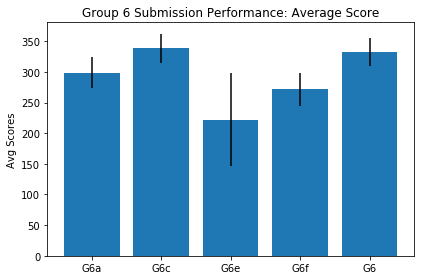

In [101]:
playerKeys = ['g6a', 'g6c', 'g6e', 'g6f', 'g6']



xAxis = ['G6a', 'G6c', 'G6e', 'G6f', 'G6']

y = np.ones(shape = [len(playerKeys)])*-1
x = np.arange(len(playerKeys))
std = np.ones(shape = [len(playerKeys)])*-1
fracWins = np.ones(shape = [len(playerKeys)])*-1
# nWins = np.ones(shape = [len(xAxisKeys)])*-1
# fracWins = np.ones(shape = [len(xAxisKeys)])*-1
for idx, key in enumerate(playerKeys):
    y[idx] = tournDict[key]['avg']
    std[idx] = tournDict[key]['std']
    fracWins[idx] = tournDict[key]['fracWins']
         
#         nWins[idx] = configResultsDict[key]['wins']
# fracWins = nWins/np.sum(nWins)
plt.bar(x, y, yerr = std, color = '#1f77b4')  
plt.ylabel('Avg Scores')
plt.title("Group 6 Submission Performance: Average Score")
plt.xticks(x, xAxis)
plt.tight_layout()
#     print(y)
# if rescaleBool:
#     plt.ylim((np.min(y) - np.min(y)*.15), (np.max(y) + np.max(y)*.15))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

#     plt.show()
plt.savefig('img/AvgScoresG6Tournament.png',dpi = 300)
# return(np.array(xAxis)[np.argsort(y)][::-1], np.sort(y)[::-1])

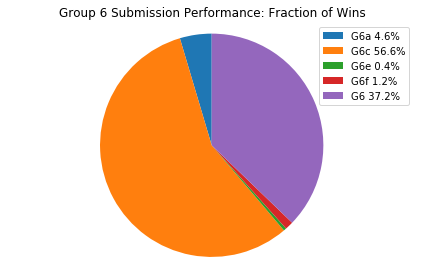

In [102]:
labels = ['G6a {}%', 'G6c {}%', 'G6e {}%', 'G6f {}%', 'G6 {}%']
sizes = fracWins*100
sizes = sizes.round(decimals = 1)
labels = [x.format(frac) for x, frac in zip(labels, sizes)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, shadow=False, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Group 6 Submission Performance: Fraction of Wins")
plt.axis('equal')
plt.tight_layout()
plt.savefig('img/fracWinsG6Tournament.png',dpi = 300)